# PCA, Eigenvalue Decomposition, SVD
> done

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [PCA, Eigenvalue Decomposition, SVD]

PCA는 입력 데이터들의 공분산 행렬에 대한 고유값분해로 볼 수 있으며 이 때 나오는 고유벡터가 주성분 벡터로서 데이터의 분포에서 분산이 큰 방향을 나타내고, 대응되는 고유값이 그 분산의 크기를 나타낸다.

SVD(특이값분해)를 이용한 데이터 압축은 데이터를 개별적으로 압축하지만 PCA는 데이터를 집합적으로 압축한다는 점이 다르다. 

ref: https://blog.clairvoyantsoft.com/eigen-decomposition-and-pca-c50f4ca15501

## PCA: Principle Components Analysis

#### the goal of PCA

- We see that data almost always comes with **information, redundancy, and noise**. 
- We always aim to **extract the maximum possible information from** the data while **reducing the noise and ignoring the redundant information**.

#### PCA can be used when we want to:

1. Reduce the number of features but cannot identify the unimportant ones that can be ignored
2. Ensure that the features of the data are independent of one another even if the features become less interpretable

#### How PCA uses this concept of eigendecomposition?

- we have a dataset with ‘n’ predictor variables.
- We center the predictors to their respective means and then get an n x n covariance matrix.
- This covariance matrix is then decomposed into eigenvalues and eigenvectors.

Covariance matrix (= dispersion matrix or variance-covariance matrix) is a matrix whose element in the i,j position is the covariance between the i-th and j-th element (feature) of a random vector (A random vector is a random variable with multiple dimensions).

$$C=\begin{bmatrix}{cov(x,x)}&{cov(x,y)}\\{cov(x,y)}&{cov(y,y)}\end{bmatrix}$$ $$=\begin{bmatrix}{\frac{1}{n}\sum(x_i-m_x)^2}&{\frac{1}{n}\sum(x_i-m_x)(y_i-m_y)}\\{\frac{1}{n}\sum(x_i-m_x)(y_i-m_y)}&{\frac{1}{n}\sum(y_i-m_y)^2}\end{bmatrix}$$

##### the properties of covariance and a covariance matrix

1. Covariance of a random variable (a predictor) with itself is simply its variance
2. Each element on the principal diagonal of a covariance matrix shows the variances of each of the random variables
3. Every covariance matrix is symmetric

- So, a covariance matrix has variances (covariance of a predictor with itself) and covariances (between predictors).
- Eigenvectors are unit vectors with length or magnitude equal to 1. They are often referred to as right vectors, which simply means a column vector.

##### Method of PCA

1. Measures how each variable is associated with one another using a Covariance matrix
2. Understands the directions of the spread of our data using Eigenvectors
3. Brings out the relative importance of these directions using Eigenvalues

--------------------------------------------------

ref: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

#### PCA For Data Visualization

`-` load iris dataset

In [1]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


`-` Standardize the Data

- Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms.

In [2]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

In [3]:
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values

In [4]:
# Standardizing the features
x = StandardScaler().fit_transform(x)

`-` PCA Projection to 2D

- In this section, the code projects the original data which is 4 dimensional into 2 dimensions.

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [6]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

`-` Visualize 2D Projection

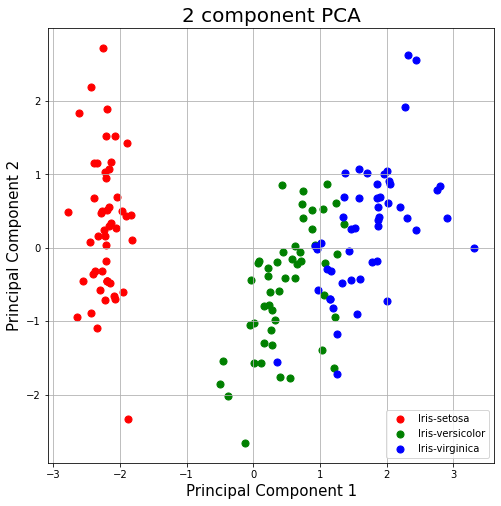

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

- The explained variance tells you how much information (variance) can be attributed to each of the principal components.
- This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this.

In [8]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

- Together, the two components contain 95.80% of the information.

`-` PCA to Speed-up Machine Learning Algorithms

- The MNIST database of handwritten digits is more suitable as it has 784 feature columns (784 dimensions), a training set of 60,000 examples, and a test set of 10,000 examples.

`-` load data

In [9]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

- **The images that you downloaded are contained in mnist.data and has a shape of (70000, 784) meaning there are 70,000 images with 784 dimensions (784 features).**
- The labels (the integers 0–9) are contained in mnist.target. The features are 784 dimensional (28 x 28 images) and the labels are simply numbers from 0–9.

`-` Split Data into Training and Test Sets

In [10]:
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)

`-` Standardize the Data

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train_img)
# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

`-` Import and Apply PCA

In [12]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

- .95 means that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.

> note: you are fitting PCA on the training set only.

In [13]:
pca.fit(train_img)

PCA(n_components=0.95)

> note: You can find out how many components PCA choose after fitting the model using pca.n_components_ . In this case, 95% of the variance amounts to 330 principal components.

`-` Apply the mapping (transform) to both the training set and the test set.

In [14]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

Apply Logistic Regression to the Transformed Data

**Step 1**: Import the model you want to use

In [15]:
from sklearn.linear_model import LogisticRegression

**Step 2**: Make an instance of the Model.

In [16]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')

**Step 3**: Training the model on the data, storing the information learned from the data

In [17]:
logisticRegr.fit(train_img, train_lbl)

/home/csy/anaconda3/envs/csy/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Step 4**: Predict the labels of new data (new images)

In [18]:
# Predict for One Observation (image)
logisticRegr.predict(test_img[0].reshape(1,-1))

array(['0'], dtype=object)

In [19]:
# Predict for One Observation (image)
logisticRegr.predict(test_img[0:10])

array(['0', '4', '1', '2', '4', '7', '7', '1', '1', '7'], dtype=object)

`-` Measuring Model Performance

In [20]:
logisticRegr.score(test_img, test_lbl)

0.9201

- While accuracy is not always the best metric for machine learning algorithms (precision, recall, F1 Score, ROC Curve, etc would be better), it is used here for simplicity.

-------------------------------------------

ref: https://sebastianraschka.com/Articles/2015_pca_in_3_steps.html

`-` load data

In [21]:
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [22]:
# split data table into data X and class labels y

X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

$$X^T=\begin{pmatrix}{x_1}\\{x_2}\\{x_3}\\{x_4}\end{pmatrix} = \begin{pmatrix}{sepal length}\\{sepal width}\\{petal length}\\{peral width}\end{pmatrix}$$

`-` Exploratory Visualization

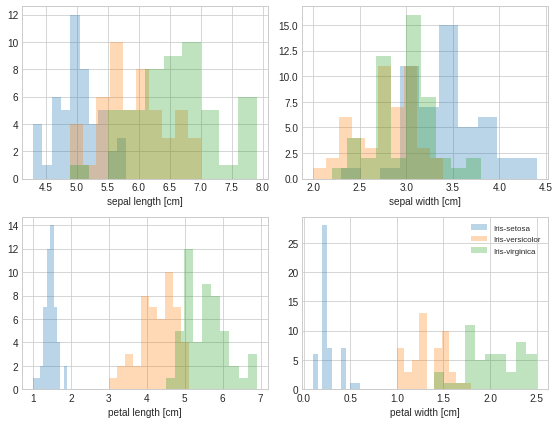

In [23]:
from matplotlib import pyplot as plt
import numpy as np
import math

label_dict = {1: 'Iris-Setosa',
              2: 'Iris-Versicolor',
              3: 'Iris-Virgnica'}

feature_dict = {0: 'sepal length [cm]',
                1: 'sepal width [cm]',
                2: 'petal length [cm]',
                3: 'petal width [cm]'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for cnt in range(4):
        plt.subplot(2, 2, cnt+1)
        for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
            plt.hist(X[y==lab, cnt],
                     label=lab,
                     bins=10,
                     alpha=0.3,)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

    plt.tight_layout()
    plt.show()

`-` Standardizing

In [24]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

1 - Eigendecomposition - Computing Eigenvectors and Eigenvalues

The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes.

`-` Covariance Matrix

The classic approach to PCA is to perform the eigendecomposition on the covariance matrix $Σ$, which is a $d×d$ matrix where each element represents the covariance between two features.
$$\sigma_{jk}=\frac{1}{n-1}\sum^{n}_{i=1}(x_{ij}-\bar{x_j})(x_{ik}-\bar{x_k})$$
$$\sum = \frac{1}{n-1}\big((X-\bar{x})^T(X-\bar{x})\big)$$
$$\bar{x}=\frac{1}{n}\sum^{n}_{i=1}x_i$$

In [25]:
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]
NumPy covariance matrix: 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [26]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('an eigendecomposition on the covariance matrix:')
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

an eigendecomposition on the covariance matrix:
Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


Correlation Matrix

In [27]:
cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigendecomposition of the standardized data based on the correlation matrix:')
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigendecomposition of the standardized data based on the correlation matrix:
Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.91081808 0.92122093 0.14735328 0.02060771]


In [28]:
cor_mat2 = np.corrcoef(X.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

print('Eigendecomposition of the raw data based on the correlation matrix:')
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigendecomposition of the raw data based on the correlation matrix:
Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.91081808 0.92122093 0.14735328 0.02060771]


We can clearly see that all three approaches yield the same eigenvectors and eigenvalue pairs:

- Eigendecomposition of the covariance matrix after standardizing the data.
- Eigendecomposition of the correlation matrix.
- Eigendecomposition of the correlation matrix after standardizing the data.

`-` Singular Value Decomposition

While the eigendecomposition of the covariance or correlation matrix may be more intuitiuve, most PCA implementations perform a Singular Value Decomposition (SVD) to improve the computational efficiency.

In [29]:
u,s,v = np.linalg.svd(X_std.T)
print('an SVD to confirm that the result are indeed the same:')
print('SVD \n%s' %u)

an SVD to confirm that the result are indeed the same:
SVD 
[[-0.52237162 -0.37231836  0.72101681  0.26199559]
 [ 0.26335492 -0.92555649 -0.24203288 -0.12413481]
 [-0.58125401 -0.02109478 -0.14089226 -0.80115427]
 [-0.56561105 -0.06541577 -0.6338014   0.52354627]]


2 - Selecting Principal Components



`-` Sorting Eigenpairs

 the eigenvectors only define the directions of the new axis, since they have all the same unit length 1, which can confirmed by the following two lines of code:

In [30]:
for ev in eig_vecs.T:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In order to decide which eigenvector(s) can dropped without losing too much information for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues: **The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data**

In [31]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.9108180837520536
0.9212209307072243
0.1473532783050957
0.020607707235624852


`-` Explained Variance

how many principal components are we going to choose for our new feature subspace?
- explained variance; how much information (variance) can be attributed to each of the principal components.

In [32]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

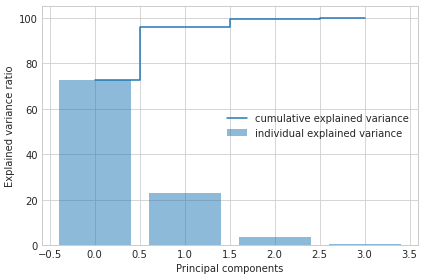

In [33]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

- 72.77% of the variance to be precise can be explained by the first principal component alone
- 23.03% of the variance(the second principal component) still bears some information
- ...
- bottomline, the first two principal components contain 95.8% of the information.

`-` Projection Matrix

The construction of the projection matrix that will be used to transform the Iris data onto the new feature subspace
- Reduce the 4-dimensional feature space to a 2-dimentional feature subplace by choosing the "top 2" eigenvectors with the highest eigenvalues to construct our $d×k$-dimensional eigenvector matrix $W$.

In [34]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


`-` 3 - Projection Onto the New Feature Space

In this last step we will use the $4×2$-dimensional projection matrix $W$ to transform our samples onto the new subspace via the equation $Y=X×W$, where $Y$ is a $150×2$ matrix of our transformed samples.

In [35]:
Y = X_std.dot(matrix_w)

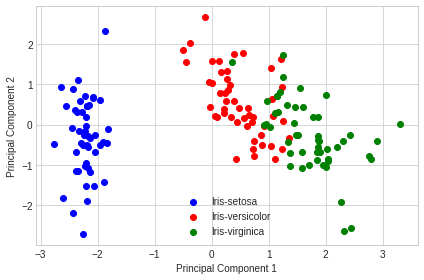

In [36]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

--------------------------------------------------

## SVD vs PCA

ref: https://jonathan-hui.medium.com/machine-learning-singular-value-decomposition-svd-principal-component-analysis-pca-1d45e885e491

> Principal component analysis (PCA) is the process of computing the principal components and using them to perform a change of basis on the data, sometimes using only the first few principal components and ignoring the rest.(https://en.wikipedia.org/wiki/Principal_component_analysis)

**PCA transforms data linearly into new properties that are not correlated with each other.**
- we can use SVD to find PCA by truncating the less important basis vectors in the original SVD matrix.

`-` Matrix diagonalization

$$A=V\Lambda V^{-1}$$


$$A=\begin{bmatrix}{}&{}&{}\\{v_1}&{v_2}&{v_3}\\{}&{}&{}\end{bmatrix}\begin{bmatrix}{\lambda_1}&{0}&{0}\\{0}&{\lambda_2}&{0}\\{0}&{0}&{\lambda_3}\end{bmatrix}\begin{bmatrix}{}&{}&{}\\{v_1}&{v_2}&{v_3}\\{}&{}&{}\end{bmatrix}^{-1}$$

`-` Singular vectors & singular values

we can multiply it with $Aᵀ$ to form $AAᵀ$ and $AᵀA$ separately.
- symmetrical,
- square,
- at least positive semidefinite (eigenvalues are zero or positive),
- both matrices have the same positive eigenvalues, and
- both have the same rank r as $A$.

Since they are symmetric, we can choose its eigenvectors to be orthonormal

- eigenvectors for $AAᵀ$ as $uᵢ$ and $AᵀA$ as $vᵢ$ 
- these sets of eigenvectors $u$ and $v$ the singular vectors of $A$.
- Both matrices have the same positive eigenvalues.
- The square roots of these eigenvalues are called singular values.

$$U^T U=I$$

$$V^T V=I$$

> In linear algebra, the singular value decomposition (SVD) is a factorization of a real or complex matrix. It generalizes the eigendecomposition of a square normal matrix with an orthonormal eigenbasis to any {\displaystyle m\times n}m\times n matrix. It is related to the polar decomposition.(https://en.wikipedia.org/wiki/Singular_value_decomposition)

#### 6.7 Singular Value Decomposition (SVD)

Introduction to Linear Algebra_Gilbert Strang

A is any m by n matrix, square or rectangular. Its rank is r. We will diagonalize this $A$, but not by $S^{-1} AS$.
- 특이값 분해
- 고유벡터 s는 3가지 큰 문제가 있다.
    - 항상 직교가 아니며
    - 항상 충분한 고유벡터를 가지고 있지 않으며,
    - $Ax=\lambda x$는 A가 squre이기를 원한다.

The $u$'s are eigenvectors of $AA^T$ and the $v$'s are eigenvectors of $A^T A$. 
- 행렬이 둘 다 대칭이기 때문에 이 고유벡터들은 직교로 선택될 수 있다.
- In equation (13) below, the simple fact that $A$ times $A^T A$ is the same as $AA^T$ will lead to a remarkable property of these u's and v's:
$$\text{"A is diagonalized"   } Av_1=\sigma_1u_1\text{  } Av_2=\sigma_2u_2\text{   }\dots Av_r=\sigma_r u_r$$
- The singular vectors $v_1, ... , v_r$ are in the row space of $A$.
- The outputs $u_1 , ... , u_r$ are in the column space of $A$. 
- The singular values $\sigma_1\dots \sigma_r$ are all positice numbers
- When the v'S and u's go into the columns of V and U, orthogonality gives $V^T V = I$ and $U^T U = I$.
- The $\sigma$'s go into a diagonal matrix $\sum$

$Ax_i=\lambda_i x_i$가 대각 $AS=A\Lambda$로 이끌기 떄문에, 방정식 $Av_i=\sigma_i u_i$는 $AV=U \Sigma$에서 column by column이라 말한다.
$$\begin{matrix} { \text{(m by n)(n by r)}} \\{\text{equals}}\\{\text{(m by r)(r by r)}}\end{matrix} A\begin{bmatrix}{}\\{v_1,\dots v_r}\\{}\end{bmatrix}= \begin{bmatrix}{}\\{u_1\dots u_r}\\{}\end{bmatrix} \begin{bmatrix}{\sigma_1}&{}&{}\\{}&{\ddots}&{}\\{}&{}&{\sigma_r}\end{bmatrix}$$
- v와 u는 A의 행과 열 공간을 차지하기도 함
- nullspace N(A)와 왼쪽 nullspace$N(A^T)$로부터 더 많은 v를 위해 n-r이 필요하고, u를 위해 m-r이 필요하다.
    - 두 공간이 직교가 된다면 자동적으로 v들과 u들은 직교가 된다.
- 그래서 행렬은 sqaure가 되고, $AV=U\Sigma$을 얻게 된다.
$$\begin{matrix} { \text{(m by n)(n by n)}} \\{\text{equals}}\\{\text{(m by m)(m by n)}}\end{matrix} A\begin{bmatrix}{}\\{v_1,\dots v_r \dots v_n}\\{}\end{bmatrix}= \begin{bmatrix}{}\\{u_1\dots u_r \dots u_m}\\{}\end{bmatrix} \begin{bmatrix}{\sigma_1}&{}&{}&{}\\{}&{\ddots}&{}&{}\\{}&{}&{\sigma_r}&{}\\{}&{}&{}&{}\end{bmatrix}$$
- 새로운 $\Sigma$은 m by n 행렬
- m-r개의 새로운 0행과 n-r개의 새로운 0 행을 가진 기존의 r * r 행렬이다.
- $V^TV=I$dhk $U^TU=I$는 유지되고,크기는  n과 m이다.
- V는 이제 $V^{-1}=V^T$인 직각 직교 행렬이다. 
- $AV=U\Sigma$은 $A=U\Sigma V^T$가 될 수 있다.

Singular Value Decomposition:
$$\text{SVD  } A=U\Sigma V^T = u_1\sigma_1 v^{T}_{1}+\dots+u_r\sigma_r v^{T}_{r}$$

This reduced SVD gives the same splitting of A into a sum of r matrices, each of rank one. 


We will see that $\sigma^{2}_{i}$ is an eigenvalue of $A^T A$ and also $AA^T$. When we put the singular values in descending order, $\sigma_1 > \sigma_2 > ... \sigma_r > 0$, the splitting in equation (4) gives the r rank -one pieces of A **in order of importance**.

--------------------------------------------------

## Eigenface

ref: https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_eigenfaces.html

In [37]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.data.shape

(400, 4096)

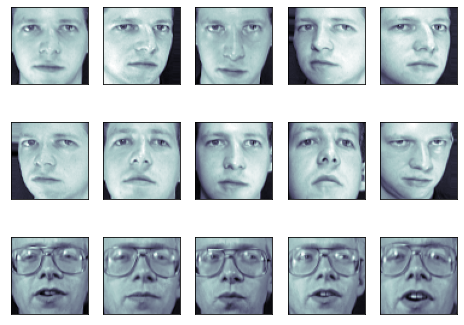

In [38]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data,
        faces.target, random_state=0)

print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


`-` Preprocessing: Principal Component Analysis

In [40]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(X_train)

PCA(n_components=150, whiten=True)

One interesting part of PCA is that it computes the “mean” face, which can be interesting to examine:

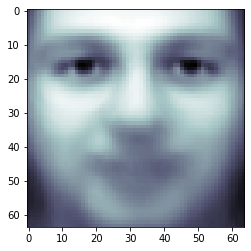

In [41]:
plt.imshow(pca.mean_.reshape(faces.images[0].shape),
           cmap=plt.cm.bone)

The principal components measure deviations about this mean along orthogonal axes.

In [42]:
print(pca.components_.shape)

(150, 4096)


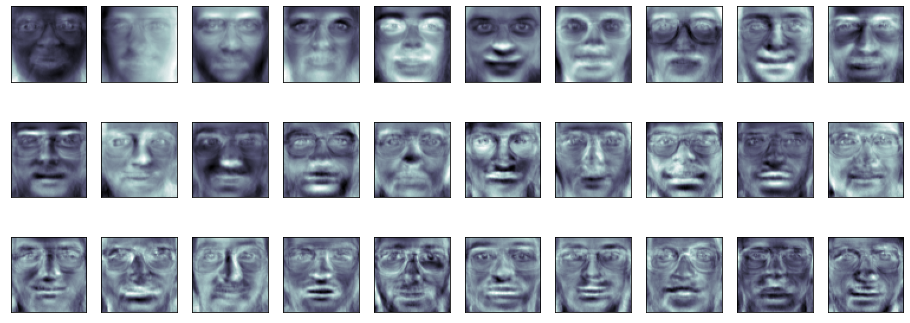

In [43]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)

The components (“eigenfaces”) are ordered by their importance from top-left to bottom-right. We see that the first few components seem to primarily take care of lighting conditions; the remaining components pull out certain identifying features: the nose, eyes, eyebrows, etc.

In [44]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)

(300, 150)


In [45]:
print(X_test_pca.shape)

(100, 150)


`-` Doing the Learning: Support Vector Machines

perform support-vector-machine classification on this reduced dataset:

In [46]:
from sklearn import svm
clf = svm.SVC(C=5., gamma=0.001)
clf.fit(X_train_pca, y_train)

SVC(C=5.0, gamma=0.001)

Finally, we can evaluate how well this classification did. First, we might plot a few of the test-cases with the labels learned from the training set:

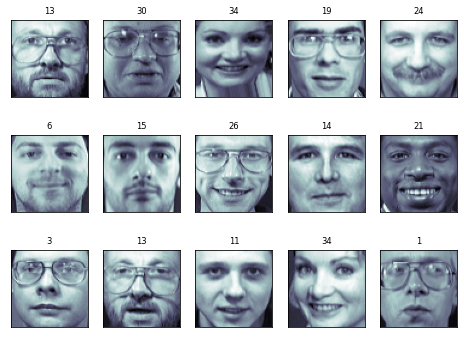

In [48]:
import numpy as np
fig = plt.figure(figsize=(8, 6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)
    y_pred = clf.predict(X_test_pca[i, np.newaxis])[0]
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(y_pred, fontsize='small', color=color)

- classifier is correct on an impressive number of images given the simplicity of its learning model!
- Using a linear classifier on 150 features derived from the pixel-level data, the algorithm correctly identifies a large number of the people in the images.

Again, we can quantify this effectiveness using one of several measures from sklearn.metrics. First we can do the classification report, which shows the precision, recall and other measures of the “goodness” of the classification:

In [49]:
from sklearn import metrics
y_pred = clf.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       1.00      1.00      1.00         4
           2       0.50      1.00      0.67         2
           3       1.00      1.00      1.00         1
           4       0.33      1.00      0.50         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         6
          19       1.00      1.00      1.00         4
          20       1.00    

Another interesting metric is the confusion matrix, which indicates how often any two items are mixed-up. The confusion matrix of a perfect classifier would only have nonzero entries on the diagonal, with zeros on the off-diagonal:

In [50]:
print(metrics.confusion_matrix(y_test, y_pred))

[[3 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 3]]


Pipelining

Above we used PCA as a pre-processing step before applying our support vector machine classifier. Plugging the output of one estimator directly into the input of a second estimator is a commonly used pattern; for this reason scikit-learn provides a Pipeline object which automates this process. The above problem can be re-expressed as a pipeline as follows:

In [51]:
from sklearn.pipeline import Pipeline
clf = Pipeline([('pca', decomposition.PCA(n_components=150, whiten=True)),
                ('svm', svm.LinearSVC(C=1.0))])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_pred, y_test))
plt.show()

[[5 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 3]]


/home/csy/anaconda3/envs/csy/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
